<a href="https://colab.research.google.com/github/ashu131998/Webapp/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [ ]:
from io import BytesIO
import tensorflow as tf
import numpy as np
from tensorflow.python.lib.io import file_io

In [ ]:
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/ceiling fan.npy', binary_mode=True))
fan = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/cat.npy', binary_mode=True))
cat = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/camel.npy', binary_mode=True))
camel = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/bicycle.npy', binary_mode=True))
bicycle = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/camera.npy', binary_mode=True))
camera = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/light bulb.npy', binary_mode=True))
bulb = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/hand.npy', binary_mode=True))
hand = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/car.npy', binary_mode=True))
eyeglasses = np.load(f)
f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/ladder.npy', binary_mode=True))
ladder = np.load(f)




In [ ]:

f = BytesIO(file_io.read_file_to_string('gs://quickdraw_dataset/full/numpy_bitmap/axe.npy', binary_mode=True))
axe = np.load(f)

In [ ]:
fan = np.c_[fan, 1*np.ones(len(fan))]
cat = np.c_[cat, 3*np.ones(len(cat))]
camel = np.c_[camel, 5*np.ones(len(camel))]
bicycle= np.c_[bicycle, 7*np.ones(len(bicycle))]
camera= np.c_[camera, 8*np.ones(len(camera))]
bulb=np.c_[bulb, 9*np.ones(len(bulb))]
hand=np.c_[hand, 10*np.ones(len(hand))]
eyeglasses=np.c_[eyeglasses, 12*np.ones(len(eyeglasses))]
ladder=np.c_[ladder, 13*np.ones(len(ladder))]

In [ ]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

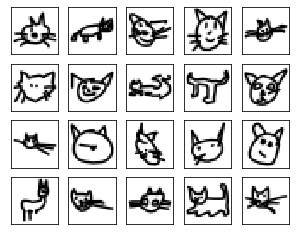

In [ ]:
plot_samples(cat
             )

In [ ]:
X = np.concatenate((fan[:10000, :-1],cat[:10000,:-1], camel[:10000, :-1],bicycle[:10000, :-1],camera[:10000,:-1], bulb[:10000,:-1], hand[:10000, :-1], ladder[:10000, :-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((fan[:10000,-1], cat[:10000,-1], camel[:10000,-1],bicycle[:10000,-1],camera[:10000,-1],bulb[:10000,-1],hand[:10000,-1],ladder[:10000,-1]), axis=0).astype('float32') # the last column

# We than split data between train and test (80 - 20 usual ratio). Normalizing the value between 0 and 1
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [ ]:
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(1, 28, 28), activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:

import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


In [ ]:
K.common.set_image_dim_ordering('th')

In [ ]:
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=20, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
64000/64000 [==============================] - 48s 754us/step - loss: 0.8169 - accuracy: 0.7372 - val_loss: 0.4377 - val_accuracy: 0.8712
Epoch 2/20
64000/64000 [==============================] - 48s 745us/step - loss: 0.4139 - accuracy: 0.8762 - val_loss: 0.3106 - val_accuracy: 0.9099
Epoch 3/20
64000/64000 [==============================] - 47s 736us/step - loss: 0.3297 - accuracy: 0.9025 - val_loss: 0.2766 - val_accuracy: 0.9162
Epoch 4/20
64000/64000 [==============================] - 48s 751us/step - loss: 0.2802 - accuracy: 0.9170 - val_loss: 0.2370 - val_accuracy: 0.9301
Epoch 5/20
64000/64000 [==============================] - 47s 740us/step - loss: 0.2489 - accuracy: 0.9263 - val_loss: 0.2240 - val_accuracy: 0.9326
Epoch 6/20
64000/64000 [==============================] - 49s 766us/step - loss: 0.2270 - accuracy: 0.9320 - val_loss: 0.1943 - val_accuracy: 0.9404
Epoch 7/20
64000/64000 [==============================] 

In [ ]:
model_cnn.save("model.h5")

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 137.3MB 96kB/s 
     |████████████████████████████████| 256kB 48.6MB/s 
     |████████████████████████████████| 921kB 46.2MB/s 
     |████████████████████████████████| 460kB 46.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=fc3a343f4fd5c792cbad020e4a0696a38b2dceb1e32a1fda7b1321db9ddb03f4
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygment

In [ ]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'